<a href="https://colab.research.google.com/github/GabrielTrentino/TCC/blob/master/C%C3%B3digos_do_TCC.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import random
import numpy as np

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [ ]:
data_path = 'https://raw.githubusercontent.com/GabrielTrentino/TCC/master/00%20-%20Dados%20Gerais%20(PIB%2C%20SELIC%2C%20DOLAR)%20-%2000%20-%20Dados%20Gerais%20(PIB%2C%20SELIC%2C%20DOLAR)%20(1).csv'
df = pd.read_csv(data_path)
df.index = pd.to_datetime(df.DateTime, format = "%m/%Y")
df.drop(["DateTime"], inplace = True, axis = 1)
df['Conc_Credito_Pfisica'] = df['Conc_Credito_Pfisica']/1000
df

,PIB,PIB_POR,PIB_Const,PIB_Const_POR,Ibovespa,Dolar,Selic,Desemprego,IPCA_acu_ano,IPCA_mês,Salario,Conc_Credito_Pjuridica,Conc_Credito_Pfisica,Conc_Total,Cesta_Basica
DateTime,,,,,,,,,,,,,,,
2013-01-01,"2,473",NaN,NaN,NaN,"59761,5","2,037",7.14,7.2,6.15,"0,86",678,110270,124.895,235165,"287,94"
2013-02-01,"2,473",NaN,NaN,NaN,"57424,3","1,96",7.12,7.7,6.31,"0,6",678,107509,115.171,222680,"286,34"
2013-03-01,"2,473",2.2,"68076,199","1,5","56352,1","1,975",7.12,8.0,6.59,"0,47",678,123133,121.230,244363,"287,78"
2013-04-01,"2,473",NaN,NaN,NaN,"55910,4","1,979",7.16,7.8,6.49,"0,55",678,126943,131.060,258003,"284,22"
2013-05-01,"2,473",NaN,NaN,NaN,"53506,1","2,023",7.40,7.6,6.50,"0,37",678,138061,131.734,269795,"293,96"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2019-08-01,NaN,NaN,NaN,NaN,"101134,6","4,138",6.00,11.8,3.43,"0,11",998,139675,159.893,299568,"420,55"
2019-09-01,NaN,1.0,"61202,591","0,4","104745,3","4,164",6.00,11.8,2.89,"-0,04",998,149510,158.811,308321,"399,4"
2019-10-01,NaN,NaN,NaN,NaN,"107219,8","4,004",5.50,11.6,2.54,"0,1",998,142616,168.511,311127,"391,31"


In [ ]:
df.PIB = df.PIB.str.replace(',','.').astype(float)
df.PIB_Const = df.PIB_Const.str.replace(',','.').astype(float)
df.PIB_Const_POR = df.PIB_Const_POR.str.replace(',','.').astype(float)
df.Ibovespa = df.Ibovespa.str.replace(',','.').astype(float)
df.Dolar = df.Dolar.str.replace(',','.').astype(float)
df.IPCA_mês = df.IPCA_mês.str.replace(',','.').astype(float)
df.Cesta_Basica = df.Cesta_Basica.str.replace(',','.').astype(float)
df.dtypes

PIB                       float64
PIB_POR                   float64
PIB_Const                 float64
PIB_Const_POR             float64
Ibovespa                  float64
Dolar                     float64
Selic                     float64
Desemprego                float64
IPCA_acu_ano              float64
IPCA_mês                  float64
Salario                     int64
Conc_Credito_Pjuridica      int64
Conc_Credito_Pfisica      float64
Conc_Total                  int64
Cesta_Basica              float64
dtype: object

In [ ]:
df.interpolate(method='linear', inplace = True)
df.fillna(df[df.index < "2013-06"].mean(), inplace = True)
df.head()

,PIB,PIB_POR,PIB_Const,PIB_Const_POR,Ibovespa,Dolar,Selic,Desemprego,IPCA_acu_ano,IPCA_mês,Salario,Conc_Credito_Pjuridica,Conc_Credito_Pfisica,Conc_Total,Cesta_Basica
DateTime,,,,,,,,,,,,,,,
2013-01-01,2.473,2.433333,69845.314667,2.0,59761.5,2.037,7.14,7.2,6.15,0.86,678,110270,124.895,235165,287.94
2013-02-01,2.473,2.433333,69845.314667,2.0,57424.3,1.960,7.12,7.7,6.31,0.60,678,107509,115.171,222680,286.34
2013-03-01,2.473,2.200000,68076.199000,1.5,56352.1,1.975,7.12,8.0,6.59,0.47,678,123133,121.230,244363,287.78
2013-04-01,2.473,2.433333,69845.314667,2.0,55910.4,1.979,7.16,7.8,6.49,0.55,678,126943,131.060,258003,284.22
2013-05-01,2.473,2.666667,71614.430333,2.5,53506.1,2.023,7.40,7.6,6.50,0.37,678,138061,131.734,269795,293.96


In [ ]:
metragem_path = 'https://raw.githubusercontent.com/GabrielTrentino/TCC/master/00%20-%20CUSTO%20DA%20METRAGEM%20POR%20TIPO%20DE%20CONSTRU%C3%87%C3%83O%20E%20ACABAMENTO%20-%2000%20-%20CUSTO%20DA%20METRAGEM%20POR%20TIPO%20DE%20CONSTRU%C3%87%C3%83O%20E%20ACABAMENTO.csv'
df_metragem = pd.read_csv(metragem_path)
df_metragem.rename(columns = {"Unnamed: 0":"Datas"}, inplace = True)
df_metragem.index = pd.to_datetime(df_metragem["Datas"], format = "%m/%Y")
df_metragem.drop("Datas", axis = 1, inplace=True)
df_metragem.head(1)

,Tipo,Alto,Normal,Baixo,Mínimo
Datas,,,,,
2013-01-01,Tipo1,NaN,870.37,602.98,521.04


In [ ]:
df_new = pd.DataFrame()
df_new['Tipo1Norm'] = df_metragem.query("Tipo == 'Tipo1'").Normal
df_new['Tipo1Baix'] = df_metragem.query("Tipo == 'Tipo1'").Baixo
df_new['Tipo1Mini'] = df_metragem.query("Tipo == 'Tipo1'").Mínimo
df_new['Tipo2Norm'] = df_metragem.query("Tipo == 'Tipo2'").Normal
df_new['Tipo2Baix'] = df_metragem.query("Tipo == 'Tipo2'").Baixo
df_new['Tipo2Mini'] = df_metragem.query("Tipo == 'Tipo2'").Mínimo
df_new['Tipo3Norm'] = df_metragem.query("Tipo == 'Tipo3'").Normal
df_new['Tipo3Baix'] = df_metragem.query("Tipo == 'Tipo3'").Baixo
df_new['Tipo3Mini'] = df_metragem.query("Tipo == 'Tipo3'").Mínimo
df_new['Tipo4Norm'] = df_metragem.query("Tipo == 'Tipo4'").Normal
df_new['Tipo4Baix'] = df_metragem.query("Tipo == 'Tipo4'").Baixo
df_new['Tipo4Alto'] = df_metragem.query("Tipo == 'Tipo4'").Alto
df_new['Tipo5Norm'] = df_metragem.query("Tipo == 'Tipo5'").Normal
df_new['Tipo5Baix'] = df_metragem.query("Tipo == 'Tipo5'").Baixo
df_new['Tipo5Mini'] = df_metragem.query("Tipo == 'Tipo5'").Mínimo
df_new['Tipo6Norm'] = df_metragem.query("Tipo == 'Tipo6'").Normal
df_new['Tipo6Baix'] = df_metragem.query("Tipo == 'Tipo6'").Baixo
df_new['Tipo6Mini'] = df_metragem.query("Tipo == 'Tipo6'").Mínimo
df_new['Tipo7Norm'] = df_metragem.query("Tipo == 'Tipo7'").Normal
df_new['Tipo7Baix'] = df_metragem.query("Tipo == 'Tipo7'").Baixo
df_new['Tipo7Mini'] = df_metragem.query("Tipo == 'Tipo7'").Mínimo
df_new.head()

,Tipo1Norm,Tipo1Baix,Tipo1Mini,Tipo2Norm,Tipo2Baix,Tipo2Mini,Tipo3Norm,Tipo3Baix,Tipo3Mini,Tipo4Norm,Tipo4Baix,Tipo4Alto,Tipo5Norm,Tipo5Baix,Tipo5Mini,Tipo6Norm,Tipo6Baix,Tipo6Mini,Tipo7Norm,Tipo7Baix,Tipo7Mini
Datas,,,,,,,,,,,,,,,,,,,,,
2013-01-01,870.37,602.98,521.04,978.80,677.45,585.42,974.20,691.48,606.03,829.03,571.12,965.66,1057.24,732.23,637.00,898.10,679.06,604.82,777.92,591.22,523.65
2013-02-01,870.62,604.88,522.83,979.16,679.57,587.40,974.54,693.58,607.96,829.04,572.85,966.19,1057.70,734.44,639.12,898.29,680.33,605.94,778.22,592.35,524.66
2013-03-01,870.31,607.91,525.92,978.74,682.83,590.76,973.66,696.25,610.94,828.13,575.29,970.03,1056.91,737.74,642.73,898.31,682.23,607.91,777.37,593.68,526.26
2013-04-01,874.64,610.41,532.68,983.89,686.07,598.62,978.81,700.02,619.04,832.38,577.69,976.14,1062.74,741.86,651.17,903.33,687.61,615.31,782.43,598.32,533.55
2013-05-01,824.72,575.44,499.21,928.02,646.83,561.19,922.75,659.55,580.28,785.26,544.56,925.62,1002.98,699.59,610.51,849.22,646.01,575.18,739.02,564.45,500.71


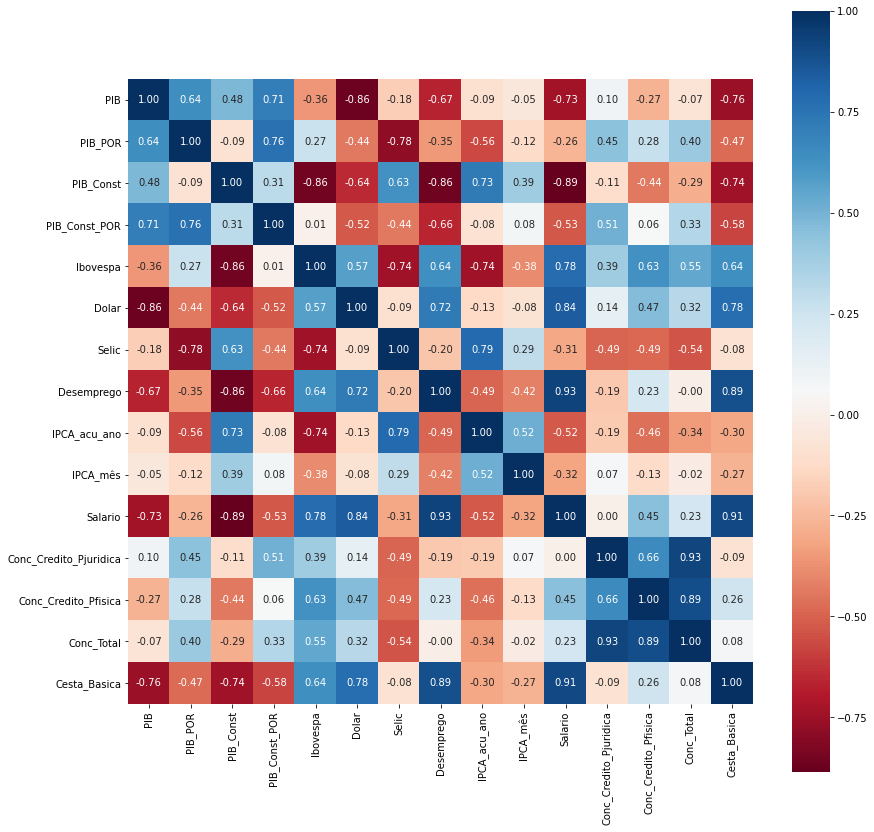

In [ ]:
fig, ax = plt.subplots(figsize = (14, 14))

sns.heatmap(df.corr(), cmap='RdBu', fmt='.2f', square=True, linecolor='white', annot=True);

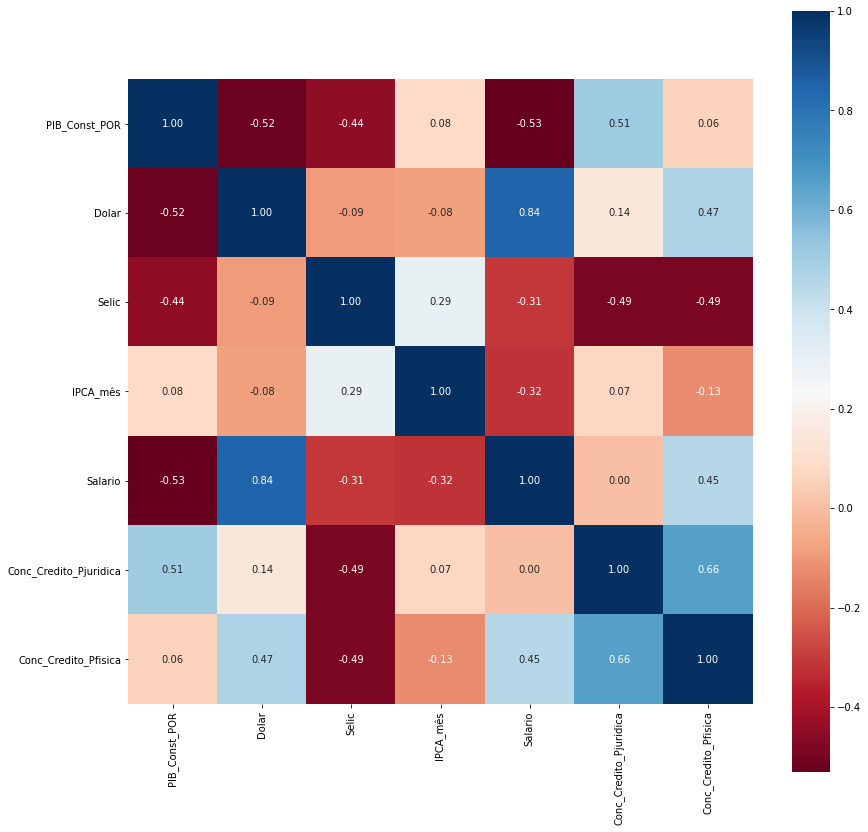

In [ ]:
df_correlacao_total = pd.concat([df, df_new.Tipo1Norm], axis = 1, sort=False)
df_correlacao_total.drop(['Conc_Total', 'PIB_Const', 'PIB_POR', 'Ibovespa', 'IPCA_acu_ano', 'PIB', 'Cesta_Basica', 'Desemprego', 'Tipo1Norm'], axis = 1, inplace = True)
fig, ax = plt.subplots(figsize = (14, 14))

sns.heatmap(df_correlacao_total.corr(), cmap='RdBu', fmt='.2f', square=True, linecolor='white', annot=True);

In [ ]:
df.drop(['Conc_Total', 'PIB_Const_POR', 'PIB_POR', 'IPCA_acu_ano', 'Conc_Credito_Pjuridica'],axis = 1, inplace = True)
df

,PIB,PIB_Const,Ibovespa,Dolar,Selic,Desemprego,IPCA_mês,Salario,Conc_Credito_Pfisica,Cesta_Basica
DateTime,,,,,,,,,,
2013-01-01,2.473,69845.314667,59761.5,2.037,7.14,7.2,0.86,678,124.895,287.94
2013-02-01,2.473,69845.314667,57424.3,1.960,7.12,7.7,0.60,678,115.171,286.34
2013-03-01,2.473,68076.199000,56352.1,1.975,7.12,8.0,0.47,678,121.230,287.78
2013-04-01,2.473,69845.314667,55910.4,1.979,7.16,7.8,0.55,678,131.060,284.22
2013-05-01,2.473,71614.430333,53506.1,2.023,7.40,7.6,0.37,678,131.734,293.96
...,...,...,...,...,...,...,...,...,...,...
2019-08-01,1.869,59906.992000,101134.6,4.138,6.00,11.8,0.11,998,159.893,420.55
2019-09-01,1.869,61202.591000,104745.3,4.164,6.00,11.8,-0.04,998,158.811,399.40
2019-10-01,1.869,59975.475333,107219.8,4.004,5.50,11.6,0.10,998,168.511,391.31


In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn import metrics

X_train = df_correlacao_total[df_correlacao_total.index < "2019"]
X_test = df_correlacao_total[df_correlacao_total.index >= "2019"]
y_train = df_new[df_new.index < '2019'].Tipo1Norm
y_test = df_new[df_new.index >= '2019'].Tipo1Norm

modelo = LinearRegression()
modelo.fit(X_train, y_train)
y_pred = modelo.predict(X_test)

print('R² = {:.2f}'.format(metrics.r2_score(y_test, y_pred)))
print('RMSE = {:.2f}'.format(metrics.mean_squared_error(y_test,y_pred, squared = True)))

R² = -0.30
RMSE = 916.10


In [ ]:
from sklearn.cross_decomposition import PLSRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import cross_val_predict

# Define PLS object
pls = PLSRegression(n_components=5)

# Fit
pls.fit(df, df_new)

# Cross-validation
y_cv = cross_val_predict(pls, df, df_new, cv=10)

# Calculate scores
score = r2_score(df_new, y_cv)
mse = mean_squared_error(df_new, y_cv)
y_cv = pd.DataFrame(y_cv)
y_cv

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20
0,875.569160,613.502887,533.310702,985.359918,689.913734,599.970233,981.470774,706.398688,622.324634,833.769280,581.912704,978.626873,1066.833455,746.386525,652.782050,901.817415,690.603120,615.143625,783.666682,602.079459,534.291353
1,869.455145,605.417849,527.100319,978.288775,680.687973,592.782863,974.140043,697.024585,614.829403,827.634769,574.087022,972.029267,1059.931151,736.943904,645.316876,894.319480,681.716480,607.939229,777.149035,594.093909,527.762862
2,872.825229,607.949496,529.073885,982.061114,683.600695,595.060369,978.262967,700.199803,617.432358,830.965314,576.473366,976.375750,1064.239159,740.179113,647.784430,897.427220,684.313064,610.176088,780.103865,596.572990,529.758987
3,881.388038,614.187711,534.187683,991.685432,690.650378,600.840149,988.104230,707.444848,623.525196,839.235174,582.360223,984.483097,1074.266651,747.689518,653.990628,906.660207,691.504969,616.206301,787.599697,602.633970,534.902624
4,876.333871,612.781948,533.415776,986.221196,689.121259,600.018732,982.404083,705.834151,622.599874,834.182590,581.010449,981.097133,1068.410023,745.967901,653.119153,902.331702,689.813160,615.181134,784.023280,601.257113,534.175213
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
79,1202.881130,841.389448,728.541205,1353.395310,945.796673,819.818492,1342.865176,964.239432,848.071226,1139.243763,793.348263,1316.035209,1458.514267,1022.585462,892.992822,1245.197065,948.232628,838.892172,1063.863047,818.513813,724.440134
80,1207.885752,845.585177,733.081993,1359.156584,950.539335,824.918009,1348.654056,969.449443,853.642863,1143.543814,797.171391,1322.271920,1465.018666,1027.974031,898.805516,1251.476412,953.416645,844.073280,1068.551460,822.554081,728.777254
81,1206.175133,848.594934,734.750744,1357.447683,954.117320,827.050516,1347.741043,973.441140,856.254148,1142.456364,800.343108,1321.630192,1462.955284,1031.442761,900.794799,1250.624599,956.453868,846.170620,1068.704211,825.943337,731.093403
82,1209.399027,854.071466,738.597000,1361.140300,960.303639,831.528125,1351.599664,979.647345,860.918824,1145.720345,805.677003,1324.273546,1466.263966,1037.622910,905.388104,1255.012271,962.453773,850.797561,1072.441332,831.361516,735.307965


#Primeira Tentativa

In [ ]:
from scipy.stats import ks_2samp

df_melhor = df[['Cesta_Basica', 'Conc_Credito_Pfisica', 'Ibovespa', 'PIB', 'PIB_Const', 'Salario', 'Selic']]
X_train = df_melhor[df_melhor.index < '2019']
X_test = df_melhor[df_melhor.index >= '2019']

y_train = pd.DataFrame(df_new[df_new.index < '2019'].Tipo1Norm)
y_test = pd.DataFrame(df_new[df_new.index >= '2019'].Tipo1Norm)

modelo = LinearRegression()
modelo.fit(X_train, y_train)
y_pred = modelo.predict(X_test)
R2 = metrics.r2_score(y_test, y_pred)
RMSE = metrics.mean_squared_error(y_test, y_pred, squared = False)
y_pred = np.ravel(y_pred)
KS = ks_2samp(y_pred, y_test.Tipo1Norm)

print('Utilizando Dolar, PIB, Selic e Consc_Credito_Pfisica:')
print('R² = {:.4f}'.format(R2))
print('RMSE = {:.3f}'.format(RMSE))
print('KS = {}'.format(KS))

Utilizando Dolar, PIB, Selic e Consc_Credito_Pfisica:
R² = -0.0857
RMSE = 27.643
KS = Ks_2sampResult(statistic=0.5833333333333334, pvalue=0.031436056203858066)


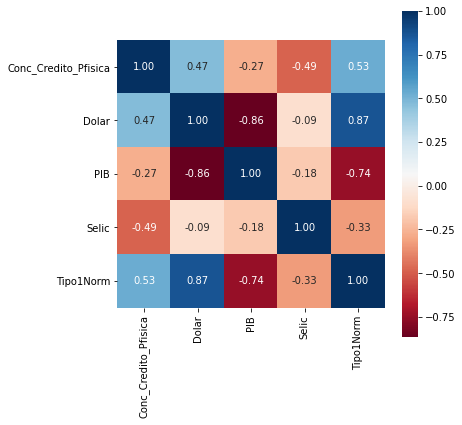

In [ ]:
fig, ax = plt.subplots(figsize = (6,6))
correlacao = pd.concat([df[['Conc_Credito_Pfisica', 'Dolar', 'PIB', 'Selic']], df_new.Tipo1Norm], axis = 1)
sns.heatmap(correlacao.corr(), cmap='RdBu', fmt='.2f', square=True, linecolor='white', annot=True);

In [ ]:
df_melhor = df[['Dolar', 'PIB', 'Selic', 'Conc_Credito_Pfisica']]
X_train = df_melhor[df_melhor.index < '2019']
X_test = df_melhor[df_melhor.index >= '2019']
resultados = []
for nome, dados in df_new.iteritems():
  y_train = pd.DataFrame(df_new[df_new.index < '2019'][nome])
  y_test = pd.DataFrame(df_new[df_new.index >= '2019'][nome])

  modelo = LinearRegression()
  modelo.fit(X_train, y_train)
  y_pred = modelo.predict(X_test)

  R2 = metrics.r2_score(y_test, y_pred)
  RMSE = metrics.mean_squared_error(y_test, y_pred, squared = False)
  y_pred = np.ravel(y_pred)
  KS = ks_2samp(y_pred, y_test[nome])

  resultados.append([nome, R2, RMSE, KS[0], KS[1], modelo.intercept_[0], modelo.coef_[0][0], modelo.coef_[0][1], modelo.coef_[0][2], modelo.coef_[0][3]])
resultados = pd.DataFrame(resultados, columns=["Tipo", "R2", "RMSE", "KS", "p-value", 'Intecepto', 'Beta1', 'Beta2', 'Beta3', 'Beta4'])
resultados

,Tipo,R2,RMSE,KS,p-value,Intecepto,Beta1,Beta2,Beta3,Beta4
0,Tipo1Norm,0.772819,12.644916,0.250000,0.868982,1016.028838,96.119019,-103.045397,-10.489817,0.187465
1,Tipo1Baix,0.049108,18.192294,0.583333,0.031436,661.827631,63.493506,-63.721667,-8.215229,0.431061
2,Tipo1Mini,0.057013,16.949829,0.583333,0.031436,564.926872,55.972353,-48.470465,-7.132875,0.317733
3,Tipo2Norm,0.785000,13.984478,0.250000,0.868982,1139.207783,108.011029,-114.814030,-11.885955,0.227248
4,Tipo2Baix,0.042249,20.790192,0.583333,0.031436,742.648972,71.173996,-71.344219,-9.309771,0.497261
5,Tipo2Mini,0.017378,19.467056,0.583333,0.031436,633.409413,62.830798,-54.726445,-8.061885,0.378240
6,Tipo3Norm,0.794211,13.262780,0.250000,0.868982,1124.435097,105.403266,-112.129877,-11.862893,0.288952
7,Tipo3Baix,0.089414,20.265527,0.583333,0.031436,747.355505,71.327620,-70.600761,-9.407545,0.566498
8,Tipo3Mini,0.066803,19.142427,0.583333,0.031436,646.249042,64.297146,-54.582377,-8.380926,0.439619
9,Tipo4Norm,0.769285,11.977029,0.333333,0.536098,971.779275,88.518967,-99.932462,-9.834591,0.210646


In [ ]:
#print(((y_test.Tipo1Norm - y_pred)**2).sum())
#print(np.mean((y_test.Tipo1Norm - y_pred)**2))
#print(np.sqrt(np.mean((y_test.Tipo1Norm - y_pred)**2)))

#Segunda Tentativa

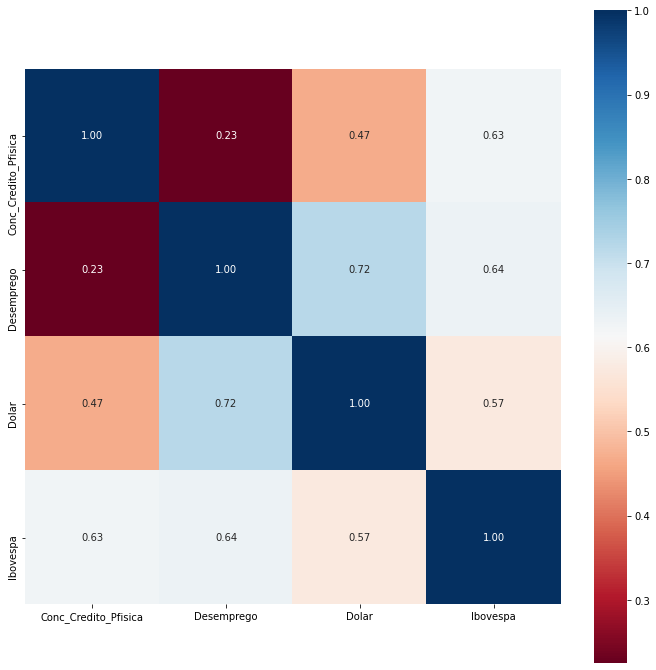

In [ ]:
correlacao = df[['Conc_Credito_Pfisica', 'Desemprego', 'Dolar', 'Ibovespa']]

fig, ax = plt.subplots(figsize = (12,12))

sns.heatmap(correlacao.corr(), cmap='RdBu', fmt='.2f', square=True, linecolor='white', annot=True)

#sns.set(font_scale=3)

plt.show(ax)

In [ ]:
df_melhor = df[['Conc_Credito_Pfisica', 'Desemprego', 'Dolar', 'Ibovespa']]
X_train = df_melhor[df_melhor.index < '2019']
X_test = df_melhor[df_melhor.index >= '2019']
resultados = []
for nome, dados in df_new.iteritems():
  y_train = pd.DataFrame(df_new[df_new.index < '2019'][nome])
  y_test = pd.DataFrame(df_new[df_new.index >= '2019'][nome])

  modelo = LinearRegression()
  modelo.fit(X_train, y_train)
  y_pred = modelo.predict(X_test)

  R2 = metrics.r2_score(y_test, y_pred)
  RMSE = metrics.mean_squared_error(y_test, y_pred, squared = False)
  y_pred = np.ravel(y_pred)
  KS = ks_2samp(y_pred, y_test[nome])
  y_pred = pd.DataFrame(y_pred, index=y_test.index)
  std = (y_pred[0]-y_test[nome]).std()
  resultados.append([nome, R2, modelo.intercept_[0].round(3), modelo.coef_[0][0].round(5), modelo.coef_[0][1].round(3), modelo.coef_[0][2].round(3), modelo.coef_[0][3].round(5)])
resultados = pd.DataFrame(resultados, columns=["Tipo", "R2", 'Intercepto', 'Beta1', 'Beta2', 'Beta3', 'Beta4'])
resultados

,Tipo,R2,Intercepto,Beta1,Beta2,Beta3,Beta4
0,Tipo1Norm,0.599633,430.859,0.90306,20.848,55.319,0.00132
1,Tipo1Baix,0.829487,286.163,0.68174,10.199,39.987,0.00155
2,Tipo1Mini,0.868747,257.837,0.56432,9.168,31.756,0.00134
3,Tipo2Norm,0.630444,483.944,1.02186,23.234,61.955,0.00153
4,Tipo2Baix,0.839236,320.600,0.77351,11.329,44.784,0.00176
5,Tipo2Mini,0.876346,287.552,0.64604,10.151,35.989,0.00152
6,Tipo3Norm,0.572019,482.246,1.04111,22.309,60.674,0.00159
7,Tipo3Baix,0.798073,327.144,0.82381,11.167,44.647,0.00183
8,Tipo3Mini,0.875332,295.976,0.69587,10.118,36.489,0.00163
9,Tipo4Norm,0.549377,414.711,0.85956,19.229,52.550,0.00125


In [ ]:
df_melhor = df[['Conc_Credito_Pfisica', 'Desemprego', 'Dolar', 'Ibovespa']]
X_train = df_melhor[df_melhor.index < '2019']
X_test = df_melhor[df_melhor.index >= '2019']
resultados = []
for nome, dados in df_new.iteritems():
  y_train = pd.DataFrame(df_new[df_new.index < '2019'][nome])
  y_test = pd.DataFrame(df_new[df_new.index >= '2019'][nome])

  modelo = LinearRegression()
  modelo.fit(X_train, y_train)
  y_pred = modelo.predict(X_test)

  R2 = metrics.r2_score(y_test, y_pred)
  RMSE = metrics.mean_squared_error(y_test, y_pred, squared = False)
  y_pred = np.ravel(y_pred)
  KS = ks_2samp(y_pred, y_test[nome])
  
  std = (y_pred[0]-y_test[nome]).std()
  resultados.append([nome, y_test, y_pred, R2, RMSE ])
resultados = pd.DataFrame(resultados, columns=["Tipo", 'y_test', 'y_pred', 'R2', 'RMSE'])
resultados

,Tipo,y_test,y_pred,R2,RMSE
0,Tipo1Norm,Tipo1Norm Datas 20...,"[1145.8951621122333, 1150.1131226314874, 1164....",0.599633,16.786438
1,Tipo1Baix,Tipo1Baix Datas 20...,"[806.3579383129255, 806.181190161652, 815.3679...",0.829487,7.703713
2,Tipo1Mini,Tipo1Mini Datas 20...,"[697.5758376885941, 697.5036073044569, 705.104...",0.868747,6.323646
3,Tipo2Norm,Tipo2Norm Datas 20...,"[1289.558075868823, 1294.0743537813264, 1310.6...",0.630444,18.334407
4,Tipo2Baix,Tipo2Baix Datas 20...,"[906.7320554590758, 906.3649488200936, 916.620...",0.839236,8.517792
5,Tipo2Mini,Tipo2Mini Datas 20...,"[785.0502031069104, 784.806110686274, 793.3467...",0.876346,6.905748
6,Tipo3Norm,Tipo3Norm Datas 20...,"[1281.0276975080847, 1284.8099180725053, 1300....",0.572019,19.126484
7,Tipo3Baix,Tipo3Baix Datas 20...,"[924.4769291317361, 923.5546624427379, 933.735...",0.798073,9.543214
8,Tipo3Mini,Tipo3Mini Datas 20...,"[812.3993072740842, 811.6370983937929, 820.234...",0.875332,6.996622
9,Tipo4Norm,Tipo4Norm Datas 20...,"[1087.064776682349, 1090.8339870772452, 1104.7...",0.549377,16.738551


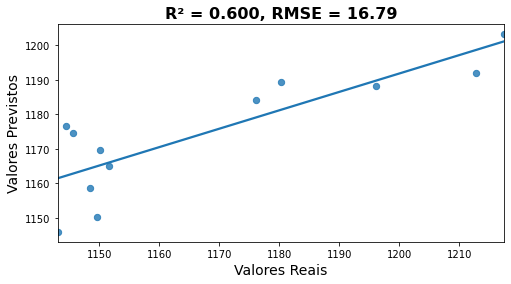

In [ ]:
fig, ax = plt.subplots(figsize=(8,4))
sns.set(font_scale=0.8)

sns.regplot(resultados.iloc[0].y_test, resultados.iloc[0].y_pred, ax = ax, ci = None, scatter_kws={"s": 40})
plt.title('R² = {:.3f}, RMSE = {:.2f}'.format(resultados.iloc[0].R2, resultados.iloc[0].RMSE), fontweight="bold", fontsize = 16)
plt.xlabel('Valores Reais', fontsize = 14)
plt.ylabel('Valores Previstos', fontsize = 14);

findfont: Font family ['Times New Roman'] not found. Falling back to DejaVu Sans.


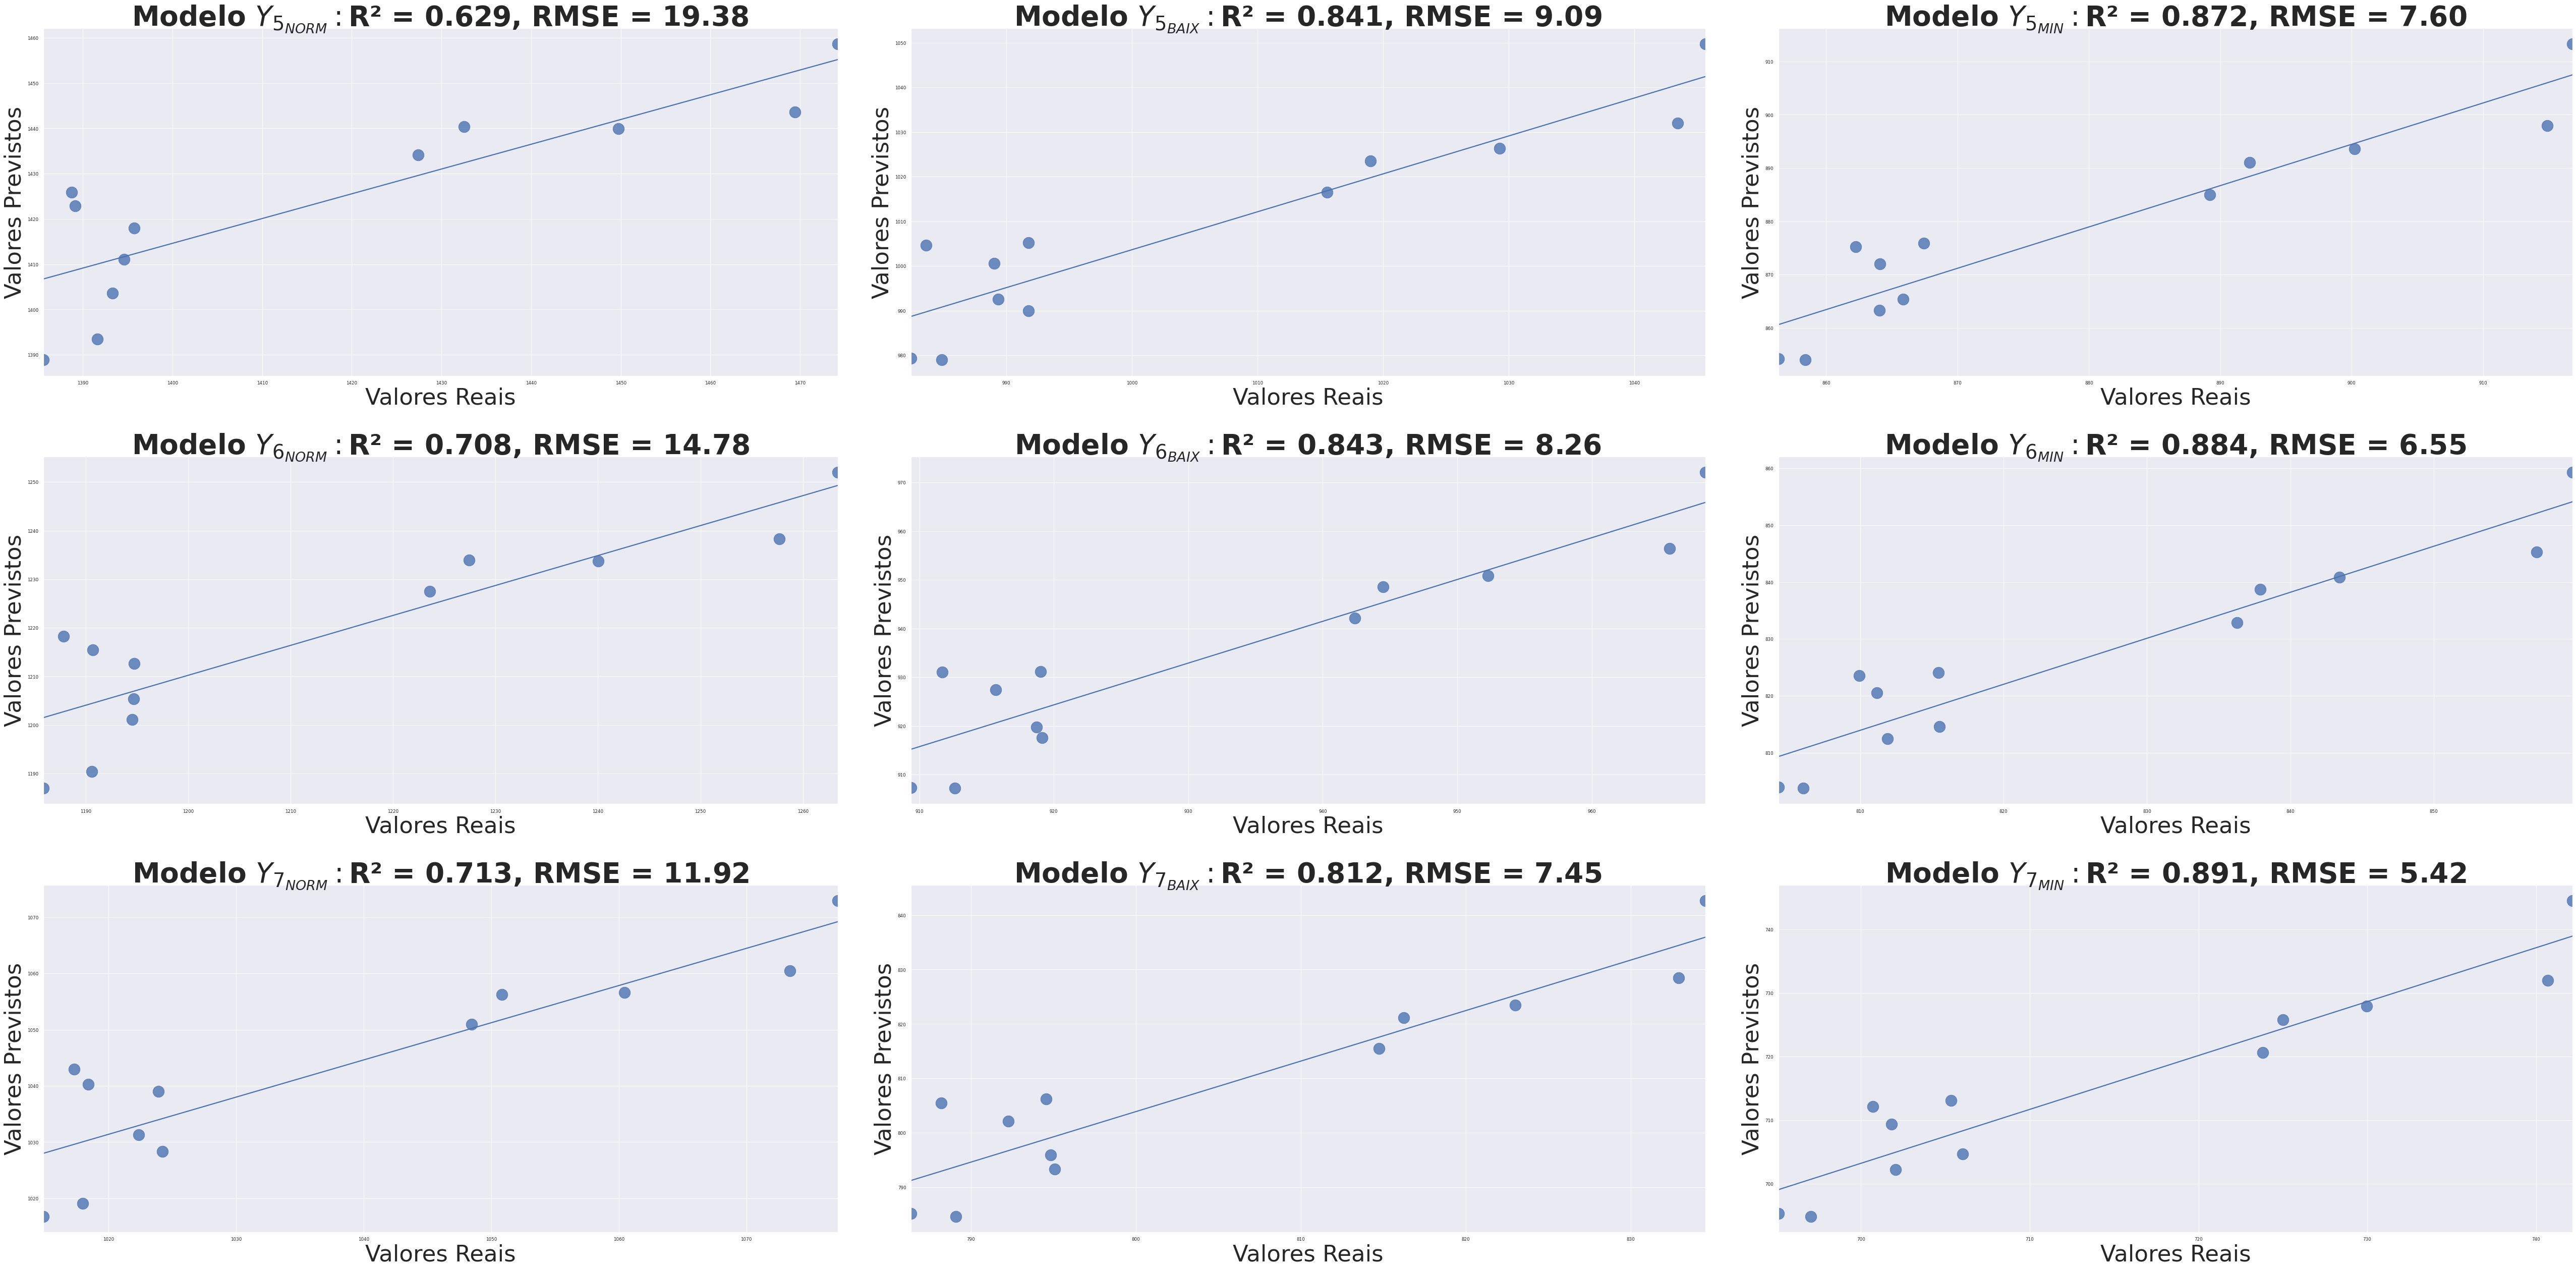

In [ ]:
fig, ax = plt.subplots(3,3, figsize = (72,36))
sns.set(font_scale=3.5)
pos= 12
latex = ['$Y_{1_{NORM}}:$', '$Y_{1_{BAIX}}:$','$Y_{1_{MIN}}:$', '$Y_{2_{NORM}}:$', '$Y_{2_{BAIX}}:$','$Y_{2_{MIN}}:$',
         '$Y_{3_{NORM}}:$', '$Y_{3_{BAIX}}:$','$Y_{3_{MIN}}:$', '$Y_{4_{NORM}}:$', '$Y_{4_{BAIX}}:$','$Y_{4_{ALTO}}:$', 
         '$Y_{5_{NORM}}:$', '$Y_{5_{BAIX}}:$','$Y_{5_{MIN}}:$', '$Y_{6_{NORM}}:$', '$Y_{6_{BAIX}}:$','$Y_{6_{MIN}}:$', 
         '$Y_{7_{NORM}}:$', '$Y_{7_{BAIX}}:$','$Y_{7_{MIN}}:$']
for linha in range(0,3):
  for coluna in range (0,3):
    modelo = resultados.iloc[pos]
    localiza = ax[linha, coluna]
    sns.regplot(modelo.y_test, modelo.y_pred, ax=localiza, ci=None, scatter_kws={"s": 500})
    localiza.set_xlabel('Valores Reais', fontsize = 45)
    localiza.set_ylabel('Valores Previstos', fontsize = 45)
    localiza.set_title('Modelo '+latex[pos]+'R² = {:.3f}, RMSE = {:.2f}'.format(modelo.R2, modelo.RMSE), fontname="Times New Roman", fontweight='bold', fontsize = 55)
    pos += 1
plt.tight_layout();

#Terceira Tentativa

In [ ]:
df_melhor = df[['Cesta_Basica', 'Conc_Credito_Pfisica', 'Desemprego', 'IPCA_mês', 'Ibovespa', 'PIB_Const', 'Salario']]
X_train = df_melhor[df_melhor.index < '2019']
X_test = df_melhor[df_melhor.index >= '2019']
resultados = []
for nome, dados in df_new.iteritems():
  y_train = pd.DataFrame(df_new[df_new.index < '2019'][nome])
  y_test = pd.DataFrame(df_new[df_new.index >= '2019'][nome])

  modelo = LinearRegression()
  modelo.fit(X_train, y_train)
  y_pred = modelo.predict(X_test)

  R2 = metrics.r2_score(y_test, y_pred)
  RMSE = metrics.mean_squared_error(y_test, y_pred, squared = False)
  y_pred = np.ravel(y_pred)
  KS = ks_2samp(y_pred, y_test[nome])

  resultados.append([nome, R2, RMSE, KS[0], KS[1]])
resultados = pd.DataFrame(resultados, columns=["Tipo", "R2", "RMSE", "KS", "p-value"])
resultados

,Tipo,R2,RMSE,KS,p-value
0,Tipo1Norm,0.743195,13.444088,0.416667,0.255775
1,Tipo1Baix,0.734406,9.614599,0.250000,0.868982
2,Tipo1Mini,0.675196,9.947716,0.250000,0.868982
3,Tipo2Norm,0.755841,14.902656,0.333333,0.536098
4,Tipo2Baix,0.737859,10.876768,0.166667,0.998485
5,Tipo2Mini,0.677195,11.157757,0.250000,0.868982
6,Tipo3Norm,0.745098,14.760808,0.500000,0.099547
7,Tipo3Baix,0.772310,10.133738,0.166667,0.998485
8,Tipo3Mini,0.739123,10.121105,0.250000,0.868982
9,Tipo4Norm,0.716847,13.268483,0.500000,0.099547
